In [1]:
# Import required libraries and dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
# Generate DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
# Data Modeling Pre-Processing 
# Imputation: there are no missing values in the dataset (all columns have 41 non-null entries)
# Encoding: Needed only if coin_id is used as a feature in modeling. If coin_id is just an identifier (ex:index), no need for encoding.

In [7]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize
scaler = StandardScaler()

# Fit
scaler.fit(df)

# Predict/Transform the data
scaled_data = scaler.transform(df)

#Convert Scaled Data to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.index = df.index # to bring back the coins

# df_scaled = df_scaled.reset_index()

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [9]:
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


In [10]:
 # OPTIONAL Dimensionality Reduction

In [11]:
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


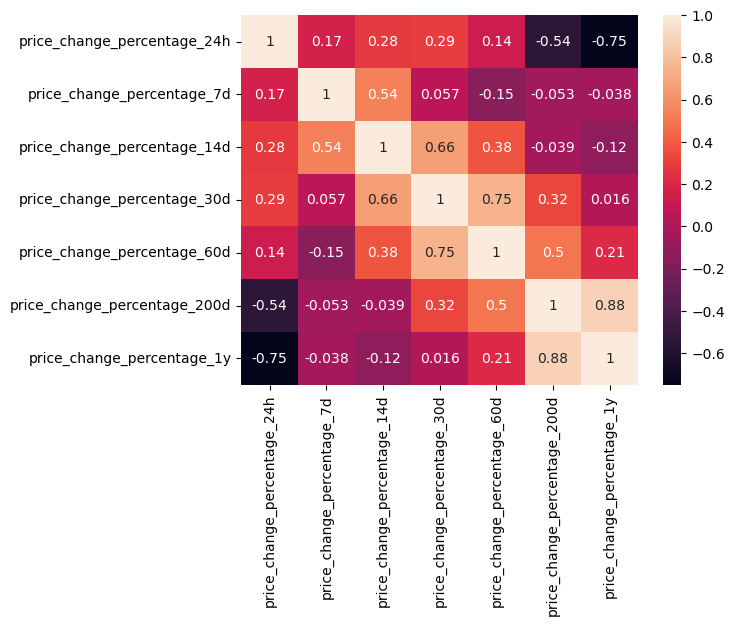

In [12]:
# Create the heatmap with annotations only on the top
sns.heatmap(corrs, annot=True)

# Show the plot
plt.show()

---

### Find the Best Value for k Using the Original Data.

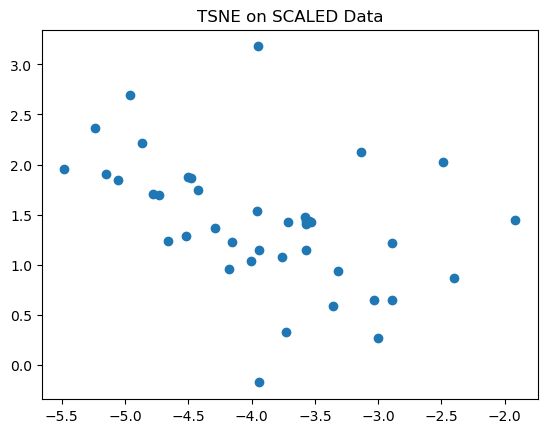

In [13]:
# t-SNE visualization of clusters.
# It helps reveal patterns and relationships that may not be obvious in high dimensions.
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [14]:
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [15]:
# Unsupervised Clustering

# KMeans on SCALED (not PCA) DATA

# Define your "X" - features to predict
X = df_scaled

In [16]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 20)) # note that k=1 breaks the silhouette score metric, and this can be 2-11

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [17]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


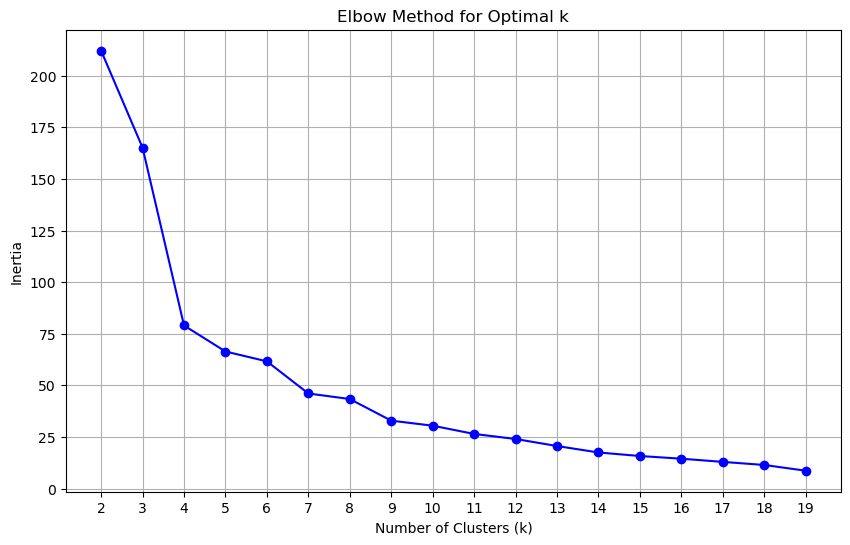

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.xticks(df_elbow['k'])  
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** This is a challenging decision because the obvious choice would be k=4. However, in case of k=5  increasing 𝑘 will always decrease inertia because more clusters can better fit the data. The objective is to identify the point where adding more clusters leads to only slight improvements in inertia, which typically happens at the elbow point. 

k=4 is chosen over k=5 because it exhibits a distinct elbow in the inertia plot. Although the CHA score slightly decreases, the enhancements in inertia and silhouette score validate the addition of a 5th cluster. The clustering quality remains robust at k=4, making it the preferable choice overall.

In [19]:
# Inertia: The sum of squared distances between each point and its assigned cluster center. It should decrease as k increases.
# Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.
# Calinski-Harabasz Score (cha_score): The ratio of the sum of between-cluster dispersion and within-cluster dispersion. A higher score is better.

### Cluster Cryptocurrencies with K-means Using the Original Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [21]:
# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [22]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [23]:
# Create a copy of the DataFrame
df_sub2 = df_scaled.copy()

In [24]:
# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [25]:
df_sub2.loc[df_sub2.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


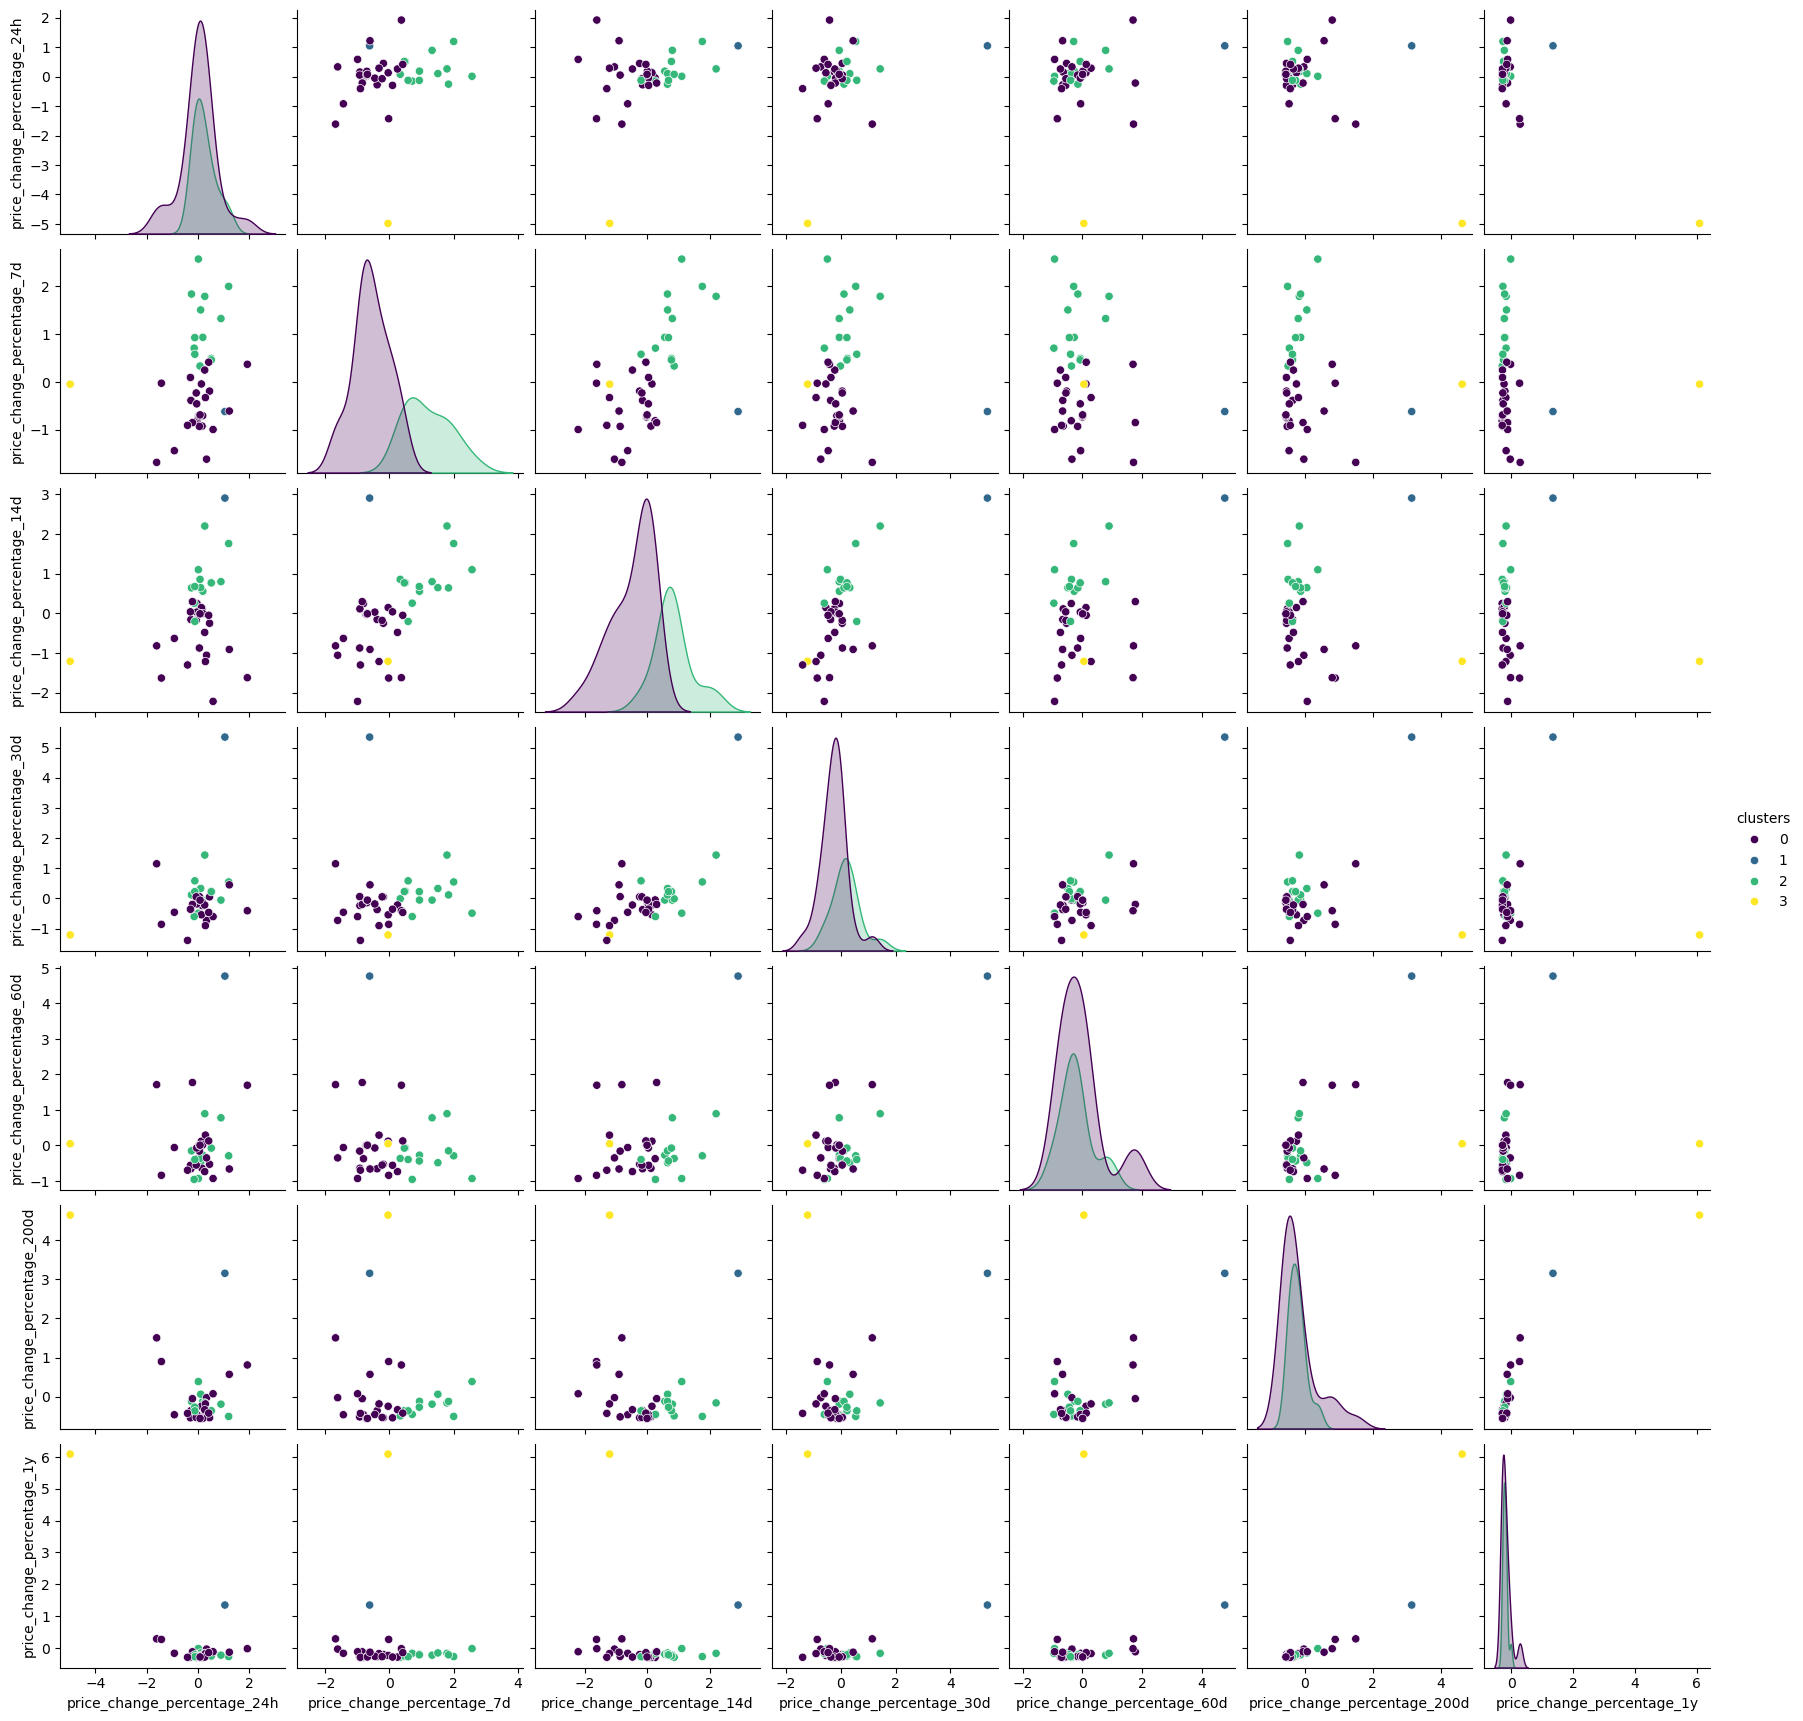

In [26]:
# Alternatively, using seaborn for a pair plot (if needed)
sns.pairplot(df_sub2.reset_index(), hue='clusters', palette='viridis', diag_kind='kde')
plt.show()

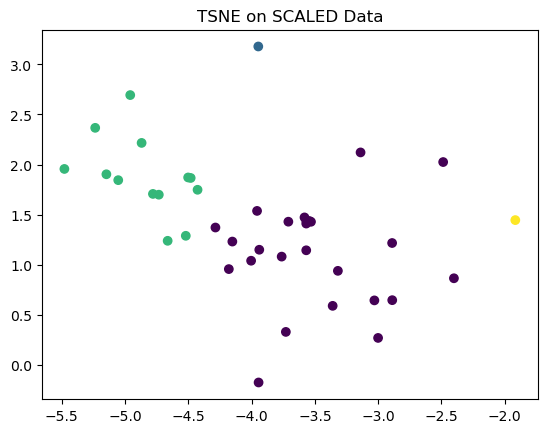

In [27]:
plt.scatter(df_tsne1[0], df_tsne1[1], c=df_sub2.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

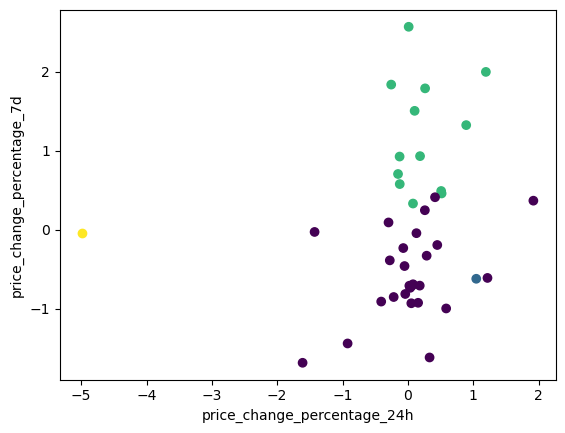

In [28]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()


In [29]:
df_sub2.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="clusters",
    hover_cols="coin_id"
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

### Optimize Clusters with Principal Component Analysis.

In [30]:
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


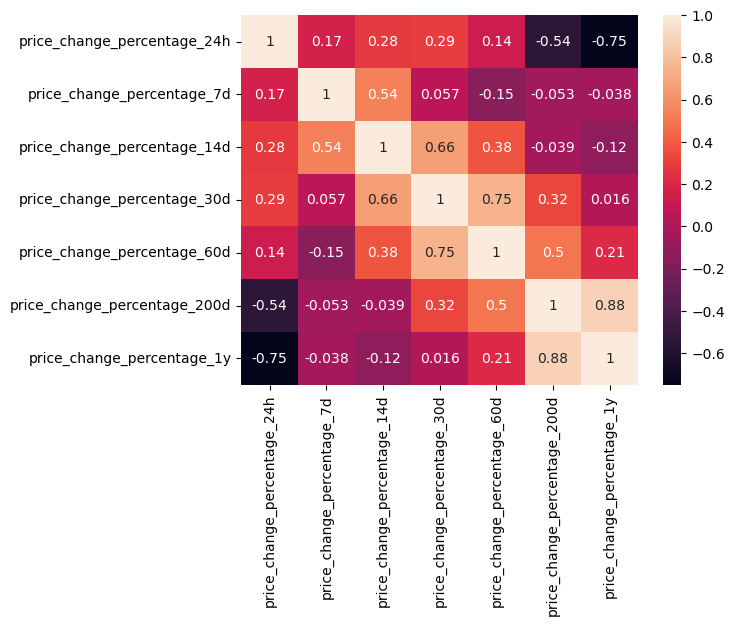

In [31]:
sns.heatmap(corrs, annot=True)
plt.show()

In [32]:
# We have multi-collinearity (# We are AFFLICTED!)

# Init
n_components = len(df_scaled.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed credit card DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,-0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,0.411513,-0.070411


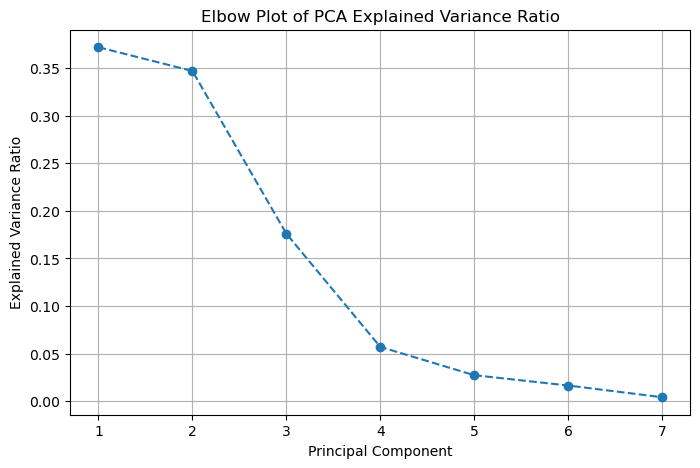

In [33]:
# Dimensionality Reduction 

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [34]:
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793, 0.05705673, 0.02729754,
       0.0164632 , 0.00415086])

In [35]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3

# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed cryptocurrency DataFrame
pca_data = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [36]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [37]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the sum of the explained variance ratio 
explained_variance_sum = np.sum(explained_variance_ratio[0:3])

# Print the result
print(explained_variance_sum)

0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**

**Total Explained Variance** =0.3719856+0.34700813+0.17603793
**Total Explained Variance** = 0.895
**The total explained variance of the three principal components is approximately 89.5% of the capture data variability. This high %  shows a highly effective dimentional reduction.

In [38]:
# Understanding Data Variability
# Captures Key Information: Explained variance measures how much of the total variance in the data is captured by a particular set of features or components. 
# High explained variance means that the components or features are effectively capturing the underlying patterns and variability in the data.
# https://en.wikipedia.org/wiki/Dimensionality_reduction 

### Find the Best Value for k Using the PCA Data

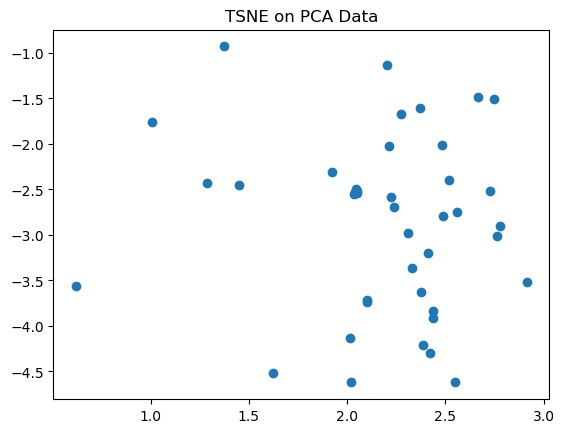

In [39]:
# Create a list with the number of k-values from 1 to 11
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_pca)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on PCA Data")
plt.show()

In [40]:
# Do Unsupervised Clustering
# KMeans on PCA DATA
# Define your "X" - features to predict
X = df_pca

In [41]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 20)) # note that k=1 breaks the silhouette score metric, and this can be 2-11

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [42]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data2 = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow2 = pd.DataFrame(elbow_data2)

df_elbow2["acc"] = df_elbow2.inertia.diff()

# Review the DataFrame
df_elbow2.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,182.339530,0.728406,15.941950,NaN
1,3,135.442408,0.356130,17.034560,-46.897122
2,4,49.665497,0.420800,51.455694,-85.776911
3,5,38.672582,0.405662,50.780512,-10.992914
4,6,34.507577,0.334511,45.107936,-4.165006
5,7,23.728365,0.375378,55.678472,-10.779212
6,8,18.574523,0.316385,60.481348,-5.153841
7,9,15.572672,0.323751,61.980734,-3.001851
8,10,11.407667,0.350621,74.116423,-4.165006
9,11,8.058822,0.361557,92.624679,-3.348845


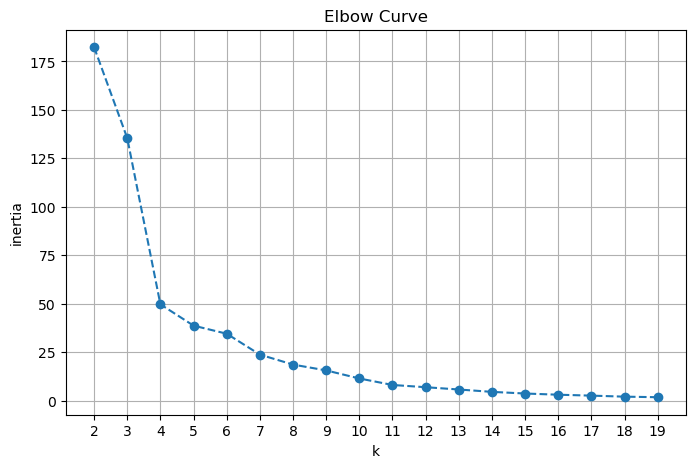

In [43]:
 # Plot the DataFrame
plt.figure(figsize=(8, 5))
plt.plot(df_elbow2["k"], df_elbow2["inertia"], marker='o', linestyle='--')
plt.title("Elbow Curve")
plt.xticks(df_elbow2["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** # k=4 looks better when using the PCA model. The inertia values where the decrease in inertia starts to slow down significantly. indicating that adding more clusters beyond this point does not add much information gain.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The inertia diviation in consistant for 5 not very much change
  * When comparing the two sets of data:

**For the First Model (Original Data):**

For k=4, the inertia was 79.022435, and the silhouette score was 0.314482.

For k=5, the inertia decreased to 66.413051, and the silhouette score increased to 0.323913.

**For the PCA Model:**

For k=4, the inertia was 49.665497, and the silhouette score was 0.420800.

For k=5, the inertia decreased to 38.672582, and the silhouette score decreased to 0.405662.

In both cases, there was a decrease in inertia and a slight decrease in the silhouette score when transitioning from 4 to 5 clusters. However, the silhouette score in the second model remained relatively high, indicating well-defined clusters.

**Inertia:** Lower inertia values suggest tighter clusters. In both scenarios, the inertia decreased when moving from k=4 to k=5, which is a positive indication.

**Silhouette Score:** Higher silhouette scores indicate better-defined clusters. In the original data model, the silhouette score increased from 0.314482 to 0.323913 when moving from k=4 to k=5, which is a positive trend. In the PCA model, the silhouette score decreased slightly from 0.420800 to 0.405662 when transitioning from k=4 to k=5, but it remained relatively high.

**The CH score** did not show a significant difference between the two models, even though it decreased when moving from k=4 to k=5.

The **PCA** model demonstrates more stability across the three scores.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [44]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [45]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [46]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [47]:
# Create a copy of the DataFrame with the PCA data
df_sub2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [48]:
df_sub2.loc[df_sub2.clusters.isin([1,3])]

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
ethlend,8.089018,-3.896891,2.301382,3
celsius-degree-token,4.792395,6.767679,-1.986985,1


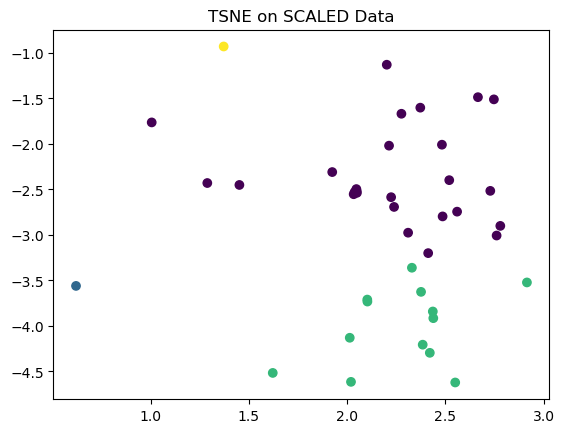

In [49]:
plt.scatter(df_tsne1[0], df_tsne1[1], c=df_sub2.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

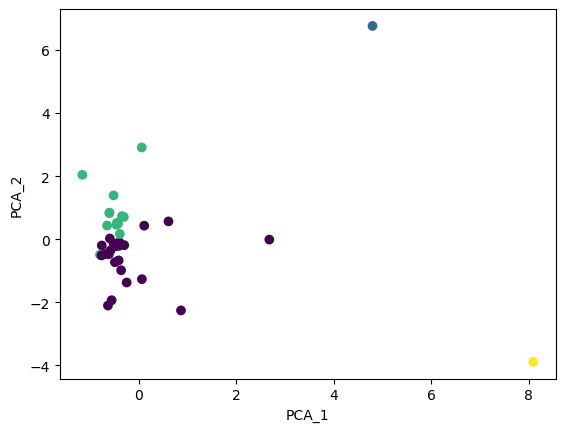

In [50]:
plt.scatter(df_sub2.PCA_1, df_sub2.PCA_2, c=df_sub2.clusters)
plt.ylabel("PCA_2")
plt.xlabel("PCA_1")
plt.show()

In [51]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_sub2.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="PCA_1",
    y="PCA_2",
    color="clusters",
    hover_cols="coin_id"
)

:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [52]:
# Composite plot to contrast the Elbow curves
# Create scatter plots for original and PCA data
df_original = pd.DataFrame(df_elbow)
df_pca = pd.DataFrame(df_elbow2)

scatter_plot = df_original.hvplot.scatter(x='k', y='inertia', label='Elbow Curve - Original Data', color='blue')
scatter_plot_pca = df_pca.hvplot.scatter(x='k', y='inertia', label='Elbow Curve - PCA Data', color='red')

# Combine plots using hvPlot
comparison_plot = scatter_plot * scatter_plot_pca
comparison_plot.opts(title="Comparison of Elbow Curves", xlabel="Number of Clusters (k)", ylabel="Inertia")
comparison_plot

# Compare Clusters using hvPlot
comparison_plot = scatter_plot + scatter_plot_pca
comparison_plot


:Layout
   .Scatter.Elbow_Curve_hyphen_minus_Original_Data :Scatter   [k]   (inertia)
   .Scatter.Elbow_Curve_hyphen_minus_PCA_Data      :Scatter   [k]   (inertia)

In [53]:
import pandas as pd
import hvplot.pandas
import holoviews as hv

# Create elbow curve plots for original data and PCA data
elbow_original = df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve - Original Data', color='blue')
elbow_pca = df_elbow2.hvplot.line(x='k', y='inertia', title='Elbow Curve - PCA Data', color='red')

# Create composite plot for comparing elbow curves
composite_elbow_plot = elbow_original + elbow_pca

# Display the composite plot
composite_elbow_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

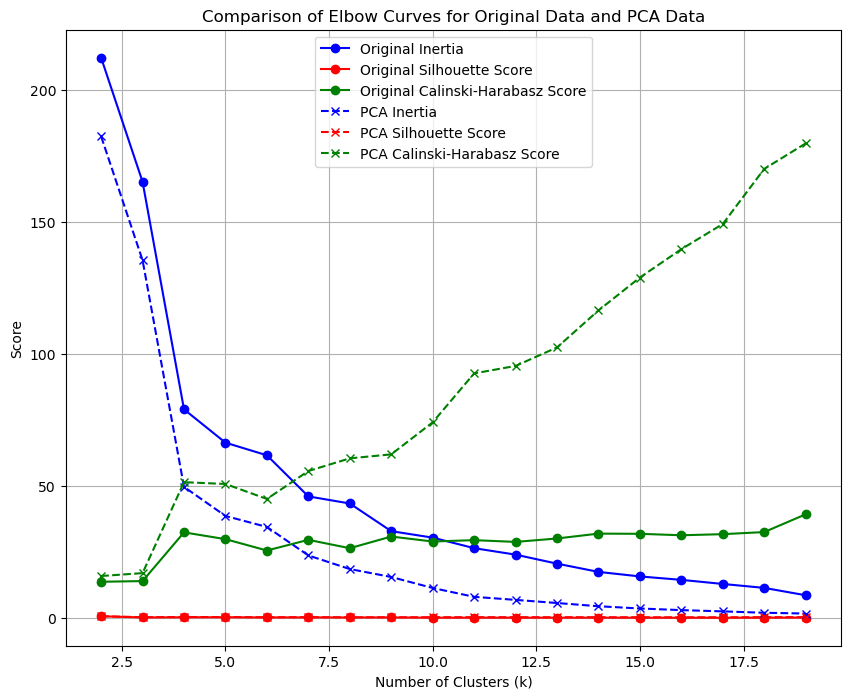

In [54]:
# Convert to DataFrames (assuming df_elbow and df_elbow2 are already defined)
data_original = pd.DataFrame(df_elbow)
data_pca = pd.DataFrame(df_elbow2)

# Create the composite plot
plt.figure(figsize=(10, 8))

# Plot Original Data Elbow Curve
plt.plot(data_original["k"], data_original["inertia"], 'bo-', label="Original Inertia", marker='o')
plt.plot(data_original["k"], data_original["silhouette_score"], 'ro-', label="Original Silhouette Score", marker='o')
plt.plot(data_original["k"], data_original["cha_score"], 'go-', label="Original Calinski-Harabasz Score", marker='o')

# Plot PCA Data Elbow Curve
plt.plot(data_pca["k"], data_pca["inertia"], 'b--', label="PCA Inertia", marker='x')
plt.plot(data_pca["k"], data_pca["silhouette_score"], 'r--', label="PCA Silhouette Score", marker='x')
plt.plot(data_pca["k"], data_pca["cha_score"], 'g--', label="PCA Calinski-Harabasz Score", marker='x')

# Titles and labels
plt.title("Comparison of Elbow Curves for Original Data and PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [55]:
import matplotlib.colors as mcolors

# Color function to highlight k=4
def highlight_k_4(row):
    return ['background-color: yellow' if row['k'] == 4 else '' for _ in row]

# Apply coloring to both DataFrames, highlighting k=4
styled_elbow = df_elbow.style.apply(highlight_k_4, axis=1)
styled_elbow2 = df_elbow2.style.apply(highlight_k_4, axis=1)

# Add captions to styled DataFrames
styled_elbow.set_caption("<b>Original Data</b>")
styled_elbow2.set_caption("<b>PCA Data</b>")

# Display comparison table with highlighted k=4
display(styled_elbow)
display(styled_elbow2)



,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,nan
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


,k,inertia,silhouette_score,cha_score,acc
0,2,182.339530,0.728406,15.941950,nan
1,3,135.442408,0.356130,17.034560,-46.897122
2,4,49.665497,0.420800,51.455694,-85.776911
3,5,38.672582,0.405662,50.780512,-10.992914
4,6,34.507577,0.334511,45.107936,-4.165006
5,7,23.728365,0.375378,55.678472,-10.779212
6,8,18.574523,0.316385,60.481348,-5.153841
7,9,15.572672,0.323751,61.980734,-3.001851
8,10,11.407667,0.350621,74.116423,-4.165006
9,11,8.058822,0.361557,92.624679,-3.348845


In [56]:
import hvplot.pandas
import holoviews as hv
from holoviews import opts

# Convert styled DataFrames back to regular DataFrames
df_elbow_display = df_elbow.reset_index()
df_elbow2_display = df_elbow2.reset_index()

# Create hvplot for the first DataFrame
plot_elbow = df_elbow_display.hvplot.table().opts(height=600, width=400)

# Create hvplot for the second DataFrame
plot_elbow2 = df_elbow2_display.hvplot.table().opts(height=600, width=400)

# Arrange the plots side by side
side_by_side = plot_elbow + plot_elbow2

# Display the plots
side_by_side

:Layout
   .Table.I  :Table   [index,k,inertia,silhouette_score,cha_score,acc]
   .Table.II :Table   [index,k,inertia,silhouette_score,cha_score,acc]

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** k=4 is considered the most optimal value for both the Original Data and PCA Data, PCA model is best. we need to consider the characteristics of the data and the purpose of clustering. Need to avoid overfitting and the impact in accruacy.

**Inertia:** In general, using fewer features can lead to lower inertia values, indicating tighter clusters. This is evident in the PCA data, where the inertia values are significantly lower compared to the original data for the same number of clusters. Lower inertia values suggest that the data points within each cluster are closer to the cluster's centroid.

**Silhouette Score:** The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. When using fewer features (PCA data), the silhouette score tends to be higher, suggesting that the clusters are more well-defined compared to using the original data.

**CH Score:** The CH score, or Calinski-Harabasz score, is another metric used to evaluate clustering performance. It considers both the cohesion within clusters and the separation between clusters. Using fewer features may lead to changes in the CH score, indicating differences in cluster compactness and separation.

**Accuracy:** The accuracy of the clustering results can also be impacted by using fewer features. In the provided data, the accuracy values show variations as the number of clusters changes, indicating how well the data points are grouped together based on the chosen features.

**Using fewer features for clustering with K-Means can lead to more compact and well-separated clusters. This is reflected in lower inertia values, higher silhouette scores, and potentially varying CH scores and accuracy values. The reduction in dimensionality achieved through PCA enhances clustering performance by emphasizing the most pertinent features for analysis.**